# Quick Sort Vs Radix Sort

In this project, we will compare the working of the two sorting techniques: Quick Sort, and the Radix Sort.

Radix Sort is said to be effective in cases when the length of array is too large, but the set of unique elements in that array is relatively too small.

For Quick Sort, the time complexity is given by $O(n\text{ }\log n)$, where n is the size of array to be sorted\
For Radix Sort, if n is the size of array and m is the number of unique elements in the array, then its complexity is given by $O(nm)$.

Note that now if m is small enough, or roughly a constant, then we will have log n > m eventually, and then Radix sort will be faster.

But if we increase m, the radix sort will perform much like the quick sort, or maybe even worse than it.

Now in the worst case, if all the elements of array are different, then m=n, which would result in $O(mn) = O(n^2)$, which is even worse than quick sort.

We will be testing all this in our experiment here.

In [1]:
# Importing libraries
from time import time
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

For a proficient testing and preventing any biases, we will use the best versions of quick and radix sort. Namely, the quick sort will be an in-place sorting technique rather than making new arrays all the time, choosing pivot randomly.\
This will be compared against the Radix sort, which has to create extra memories while sorting.

In [2]:
# Quick Sort
def quick_sort(arr, low, high):
  if low >= high:
    return
  pivot = random.sample(range(low, high+1), 1)[0]
  arr[high], arr[pivot] = arr[pivot], arr[high]
  i = low - 1
  for j in range(low, high):
    if arr[j] <= arr[high]:
      i += 1
      arr[i], arr[j] = arr[j], arr[i]
  arr[i+1], arr[high] = arr[high], arr[i+1]
  quick_sort(arr, low, i)
  quick_sort(arr, i+2, high)

In [3]:
# Radix Sort
def radix_sort(arr, k):
  for i in range(1, k+1):
    m = [0 for _ in range(10)]
    for j in range(len(arr)):
      m[(arr[j] // 10**(i-1)) % 10] += 1
    for j in range(1, 10):
      m[j] = m[j] + m[j-1]
    w = [0 for _ in range(len(arr))]
    for j in range(len(arr)-1, -1, -1):
      w[m[(arr[j] // 10**(i-1)) % 10]-1] = arr[j]
      m[(arr[j] // 10**(i-1)) % 10] -= 1
    arr = w
  return arr

In [4]:
# Testing their times taken and plotting their times taken
def f(k):
  radix_time, quick_time = [], []
  for n in tqdm(range(10, 2*10**4, 100)):
    x = [random.sample(range(10**k), 1)[0] for _ in range(n)]
    t_radix = time()
    radix_sort(x, k)
    t_radix = time() - t_radix
    t_quick = time()
    quick_sort(x, 0, n-1)
    t_quick = time() - t_quick
    radix_time.append(t_radix)
    quick_time.append(t_quick)

  plt.plot(list(range(10, 2*10**4, 100)), radix_time, marker='o', label='Radix Time')
  plt.plot(list(range(10, 2*10**4, 100)), quick_time, marker='s', label='Quick Time')

  plt.xlabel("Length of array")
  plt.ylabel("Time")
  plt.title("Radix Vs Quick sort")
  plt.legend()
  plt.grid(True)
  plt.show();

Now we are ready with everything. We will now vary the number of digits allowed in the arrays and compare the results.

100%|██████████| 200/200 [00:31<00:00,  6.30it/s]


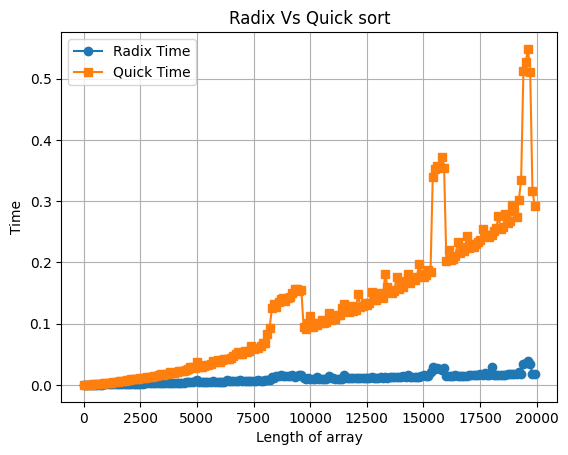

In [5]:
f(2)

Here we see that Radix sort have outperformed Quick sort by a huge margin. This was expected, since for arrays with just two digits allowed, Radix sort will basically behave like a linear time algorithm.

Lets see what happens if we relax this bound on the number of digits allowed.

100%|██████████| 200/200 [00:16<00:00, 12.20it/s]


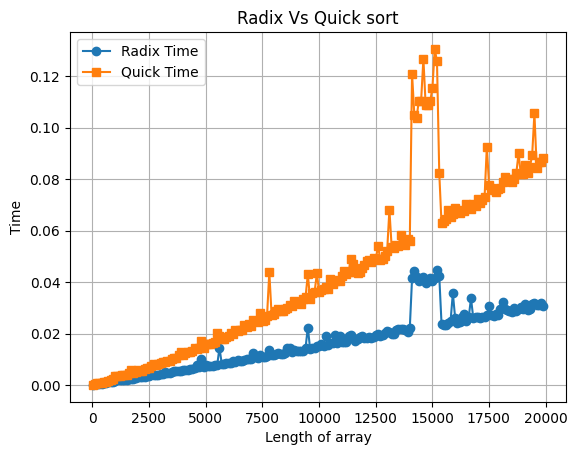

In [6]:
f(3)

100%|██████████| 200/200 [00:16<00:00, 11.97it/s]


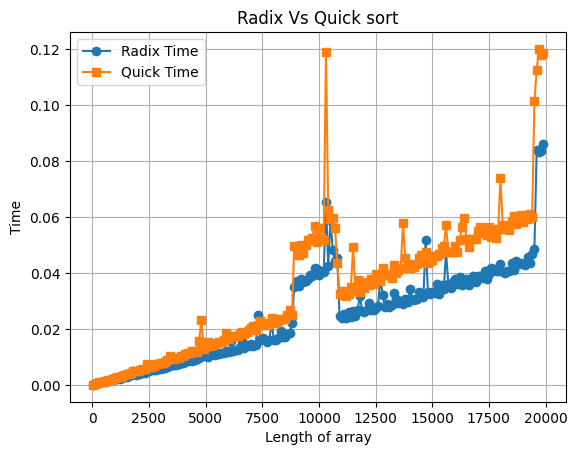

In [7]:
f(4)

100%|██████████| 200/200 [00:17<00:00, 11.29it/s]


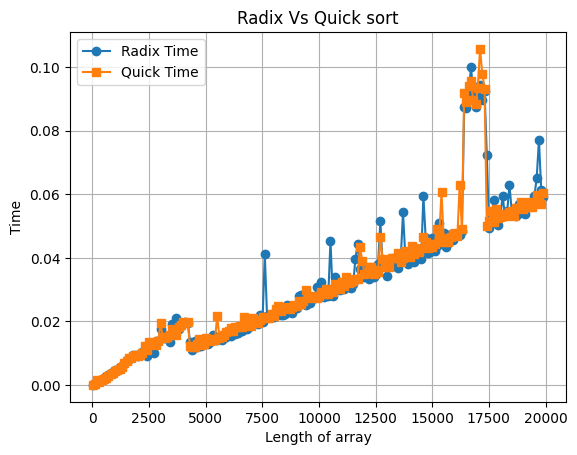

In [8]:
f(5)

Here, we see that both the sorting algorithms are performing almost similarly. This was expected here, since at this stage, $\log n \approx m$, and so $n \log n \approx mn$